# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Этап 1. Получение данных

**1. Импортируем библиотеку pandas, matplotlib и seaborn. Считываем данные из csv-файла в датафрейм и сохраняем в переменную `data`.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100

In [2]:
#прочитаем файл real_estate_data.csv с информацией об объявлениях и сохраним его в переменной data

server_path = '/datasets/real_estate_data.csv'
filename = 'real_estate_data.csv'

try:
    data = pd.read_csv(filename, sep='\t') 
except: 
    data = pd.read_csv(server_path, sep='\t')

**2. Выводим первые 20 строчек датафрейма `data` на экран.** 

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


**3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**4. Изучим основные характеристики датасета в транспонированном виде методом describe().**

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,"23,699.00",9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,"23,699.00","6,541,548.77","10,887,013.27","12,190.00","3,400,000.00","4,650,000.00","6,800,000.00","763,000,000.00"
total_area,"23,699.00",60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,"23,699.00",2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,"23,613.00",10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,"21,796.00",34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,"23,699.00",5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,"21,421.00",10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,"12,180.00",1.15,1.07,0.00,0.00,1.00,2.00,5.00


**5. Строим общую гистограмму для всех числовых столбцов таблицы.**

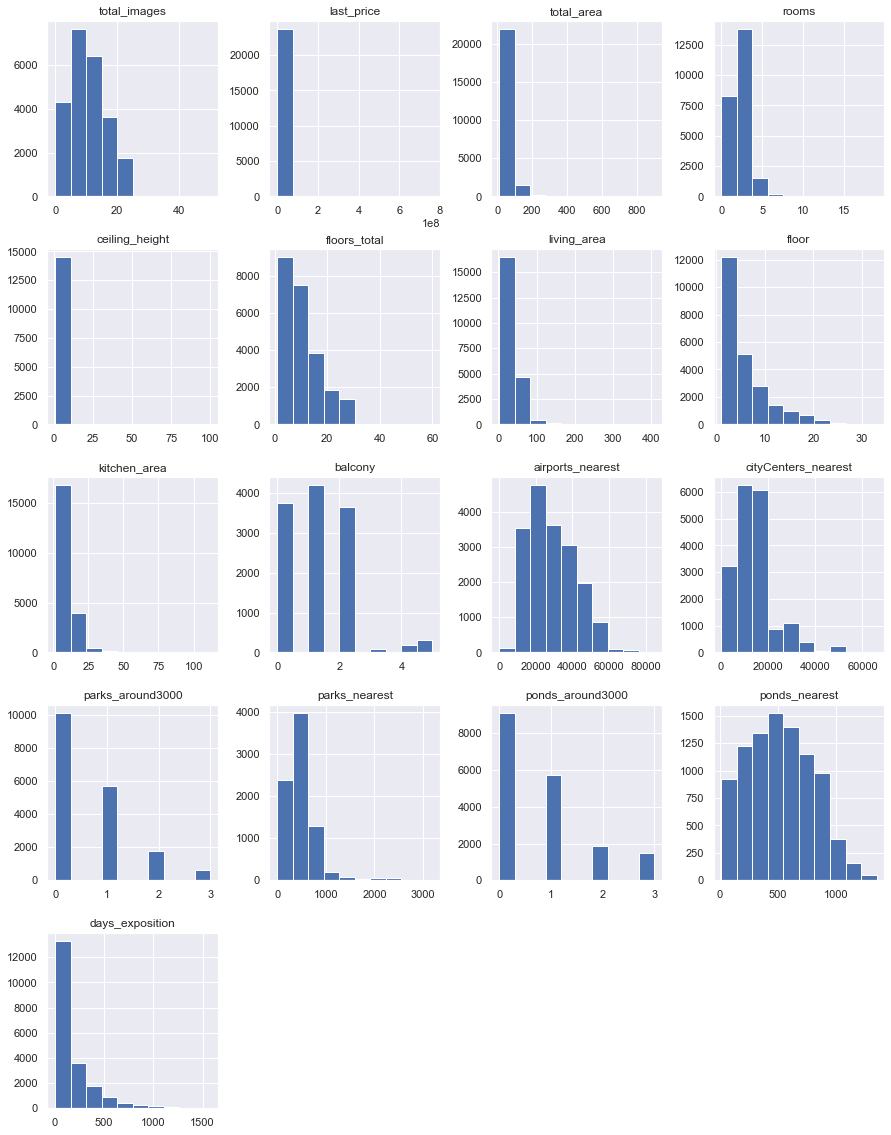

In [6]:
data.hist(figsize=(15,20))
plt.show()

**Выводы:**

1) В датафрейме много пропущенных значений в различных столбцах, поэтому необходимо выяснить, влияют ли пропуски в этих столбцах на формирование стоимости жилья;

2) В некоторых столбцах некорректный тип данных (десятичные значения вместо целых);

3) Также на графиках видим аномальные значения, значит, в данных явно есть выбросы. Также во многих столбцах высокое стандартное отклонение, что также говорит о том, что с данными что-то не так. 

### Этап 2. Предобработка данных

**6. Выводим количество пропущенных значений для каждого столбца.**

In [7]:
data.isna().mean()*100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

**7. Заполняем пропущенные значения.**

**7.1. Начнем с `ceiling_height`. Путем метода unique() посмотрим, что там со значениями.**

In [8]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [9]:
#видим потолки 24 метра и даже 32, скорректируем такие значения
data[data['ceiling_height'] == 32.] = data[data['ceiling_height'] == 3.2]
data[data['ceiling_height'] == 27.] = data[data['ceiling_height'] == 2.7]
data[data['ceiling_height'] == 26.] = data[data['ceiling_height'] == 2.6]
data[data['ceiling_height'] == 24.] = data[data['ceiling_height'] == 2.4]
data[data['ceiling_height'] == 25.] = data[data['ceiling_height'] == 2.5]
data[data['ceiling_height'] == 20.] = data[data['ceiling_height'] == 2.0]

Медианой потолки не заполняю, т.к. будет перекос (много пропусков). Если сортируем датасет по высоте потолков, то очень большое количество значений теряем.

**7.2. Заполним пропуски в столбце `balcony`.**

In [10]:
#если количество балконов не указано, то считаем, что их в квартире нет, - соответственно, заполняем нулями
data['balcony'] = data['balcony'].fillna(0)

**7.3. Заполним пропуски в столбце `living_area`.**

In [11]:
#прежде, чем заполнять пропущенные значения, необходимо исключить аномалии 
#ранее мы построили гистограмму для каждого столбца, исходя из которой видно, что большинство значений >15 и <200

data = data[data['living_area'] <= 200]
#исключили аномальные значения 

In [12]:
#найдём коэффициент соотношения средней общей площади (там где она есть .isnull() == False) к среднему жилой площади:
area_kof = data['total_area'].mean() / data['living_area'].mean() 
 
#заполняем пропуски в 'living_area' отношением общей площади на коэффициент
data['living_area'] = data['living_area'].fillna(data['total_area']/area_kof)

**7.4. Заполним пропуски в столбце `kitchen_area`.**

In [13]:
#прежде, чем заполнять пропущенные значения, необходимо исключить аномалии
#по ранее построенному общему графику видно, что большинство значений находится в пределах: >0 и <70
data = data[((data['kitchen_area'] >= 0) & (data['kitchen_area'] <= 70))]
#исключаем аномальные значения 

In [14]:
#найдём коэффициент соотношения средней кухни (там где она есть .isnull() == False) к среднему жилой площади:
kitchen_area_kof = data['living_area'].mean() / data['kitchen_area'].mean() 
 
#заполняем пропуски отношением общей площади на коэффициент
data['kitchen_area'] = data['kitchen_area'].fillna(data['living_area']/kitchen_area_kof)

**7.5. Заполним пропуски в столбце `is_apartment`.**

In [15]:
#меняем тип столбца на 'bool' и значения автоматически подтягиваются
data['is_apartment'] = data['is_apartment'].astype('bool')

**7.6. Удалим пропуски в столбце `floors_total`, так как пропущенных значений немного.**

In [16]:
data = data.dropna(subset=['floors_total'])

In [17]:
#еще раз проверяем пропуски
data.isna().sum()
#значения в обработанных нами столбцах заполнились

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           7602
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              38
airports_nearest         4661
cityCenters_nearest      4642
parks_around3000         4641
parks_nearest           13666
ponds_around3000         4641
ponds_nearest           12840
days_exposition          2875
dtype: int64

Промежуточный вывод: мы заполнили пропущенные значения в столбцах 'is_apartment' (путем изменения типа данных), 'kitchen_area', 'living_area' и 'balcony'. 
Также удалили пропуски в 'floors_total'.
Пропуски в столбцах с площадью кухни, жилой площади и количеством этажей в доме однозначно повлияли бы на последующее исследование и финальные выводы, поэтому мы заполнили данные пропуски разными способами. 
Мы не стали заполнять пропущенные значения в остальных столбцах, так как в большинстве случаев количество пропусков либо не отразится на исследовании, т.к. данных достаточно, либо заполнить пропуски корректно не представляется возможным, т.к., например, в городе нет как такового центра или водоема, чтобы заполнить пропуски в столбцах 'ponds_nearest' и 'cityCenters_nearest'. 
Пропущенные значения могли появиться в датасете по нескольким причинам: 1) при размещении объявления данные забыли указать; 2) данные отсутствуют, как, например, в случае с балконом, его может не быть, или в столбце 'days_exposition' не будет данных, если объявление еще открыто; 3) данные некорректно выгружены (неверный тип данных в столбце 'is_apartment').

**8. Меняем типы данных в тех столбцах, где это необходимо.**

In [18]:
#в столбце 'is_apartment' тип значений изменили ранее

data['balcony'] = data['balcony'].astype(int)
#в столбце 'floor' у нас тип 'int', поступим аналогично и с 'floors_total'
data['floors_total'] = data['floors_total'].astype(int)
#также меняем тип данных в столбце 'first_day_exposition', чтобы далее с ним работать
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#в рамках работы над датасетом почему-то поменялись типы данных в столбцах, перевожу обратно...
data['total_images'] = data['total_images'].astype(int)
data['floor'] = data['floor'].astype(int)
data['rooms'] = data['rooms'].astype(int)
data['studio'] = data['studio'].astype(bool)

Меняем тип данных в столбце 'balcony', т.к. в этом столбце может быть только целое число. 
В столбце 'floors_total' изначально тип float, однако в этом столбце может быть только целочисленный тип данных. Меняем тип данных, чтобы потом корректно оценить влияние этажа на стоимость жилья. 
Меняем тип данных в first_day_exposition, т.к. без изменения типа данных в последующем невозможно будет добавить новые столбцы.

In [19]:
#чтобы перевести в тип int пропущенные значения заполняю нулями 
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

In [20]:
#проверяем заполнение пропусков и типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20889 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20889 non-null  int32         
 1   last_price            20889 non-null  float64       
 2   total_area            20889 non-null  float64       
 3   first_day_exposition  20889 non-null  datetime64[ns]
 4   rooms                 20889 non-null  int32         
 5   ceiling_height        13287 non-null  float64       
 6   floors_total          20889 non-null  int32         
 7   living_area           20889 non-null  float64       
 8   floor                 20889 non-null  int32         
 9   is_apartment          20889 non-null  bool          
 10  studio                20889 non-null  bool          
 11  open_plan             20889 non-null  object        
 12  kitchen_area          20889 non-null  float64       
 13  balcony         

Видим, что все корректно заполнилось.

**9. Устраняем неявные дубликаты в столбце `locality_name`.**

In [21]:
#проверяем уникальные наименования
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

In [22]:
#сразу приводим в порядок шрифт и меняем ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [23]:
#предлагаю удалить название населенного пункта вовсе
duplicated = ['городской поселок ', 'поселок ', 'коттеджный поселок ',
             'коттеджный', 'городского типа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'село ', 'при железнодорожной станции ',
             'станции ', 'деревня']
for i in duplicated:
    data['locality_name'] = data['locality_name'].str.replace(i, '')

In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', ' Кудрово',
       'Колпино', 'Гатчина', ' Федоровское', 'Выборг', 'Кронштадт',
       'Кировск', ' Новое Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Новая Ропша',
       'Павловск', ' Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', ' Куттузи', 'Аннино', ' Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       ' Старая', ' Лесколово', 'Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', ' Оржицы', ' Кальтино', 'Кудрово',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Павлово', 'Оредеж', 'Красный Бор', 'Коммунар',
       'Молодежное', ' Нурма', 'Синявино', 'Тосно', 'Стрельна',
       'Бокситогорск', 'Александровская', ' Лопухинка', '

In [25]:
data.duplicated().sum()

0

**10. Обработка аномалий и выбивающихся значений.**

**10.1. Разбираемся с аномалиями в столбце `total_area`.**

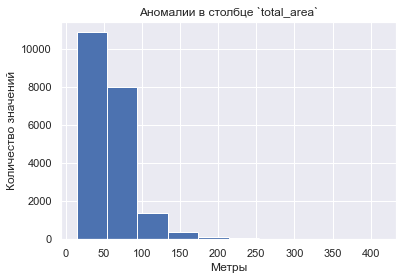

In [26]:
#построим повторно гистограмму
data['total_area'].hist()
plt.title('Аномалии в столбце `total_area`')
plt.xlabel('Метры')
plt.ylabel('Количество значений')
plt.show()

Видим, что большинство значений находится до 200 метров, поскольку ранее мы ограничились в исследовании метражом 'living_area' = 200, то откинем также все значения свыше 200.

In [27]:
data = data[data['total_area'] <=200]

**10.2. Посмотрим на аномалии в столбце `rooms`.**

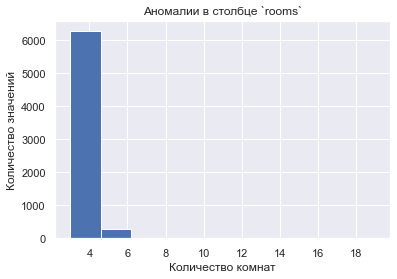

In [83]:
#на общем графике, построенном в начале проекта видно, что в большинстве случаев комнат 1-4, поэтому посмотрим, что за пределами этиих значений
data['rooms'].hist(range=(3, 19))
plt.title('Аномалии в столбце `rooms`')
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
plt.show()

Видим, что подавляющее большинство значений до 8, исключим аномалии.

In [29]:
data = data[data['rooms'] <= 8]

**10.3. Разбираем аномалии в столбце `kitchen_area`.**

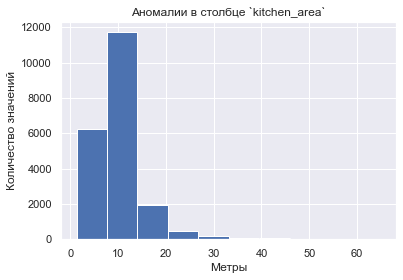

In [84]:
data['kitchen_area'].hist()
plt.title('Аномалии в столбце `kitchen_area`')
plt.xlabel('Метры')
plt.ylabel('Количество значений')
plt.show()

In [31]:
#отбросим значения свыше 75
data = data[data['kitchen_area'] <= 75]

**10.4. Разберемся с аномалиями в столбце `last_price`.**

In [32]:
#и еще раз посмотрим информацию по столбцу
data['last_price'].describe()

count        20,731.00
mean      6,038,688.11
std       6,172,986.17
min          12,190.00
25%       3,500,000.00
50%       4,650,000.00
75%       6,700,000.00
max     330,000,000.00
Name: last_price, dtype: float64

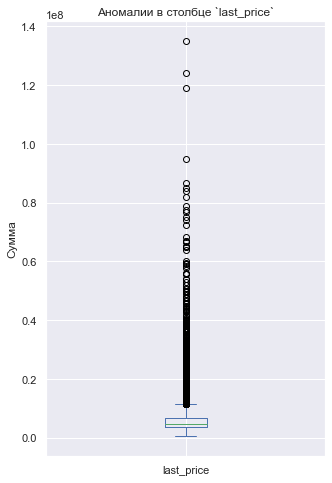

In [86]:
#видим, что минимальное значение - 12.190, что совсем странно, а максимальное значение аж 330 млн.
#построим ящик с усами
data['last_price'].plot(kind='box', figsize=(5, 8))
plt.title('Аномалии в столбце `last_price`')
plt.ylabel('Сумма')
plt.show()

Исключим значения свыше 200 000 000 млн., т.к. в нашем датасете их почти нет. 

In [34]:
data = data[data['last_price'] <= 200000000]

In [35]:
#избавляемся от квартиры за 12 тыс. рублей 
#print(data[data['last_price'] == 12190.00])
data.drop(index=8793, inplace=True)

**10.5. Обработаем значения в столбце `floors_total`.**

In [36]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

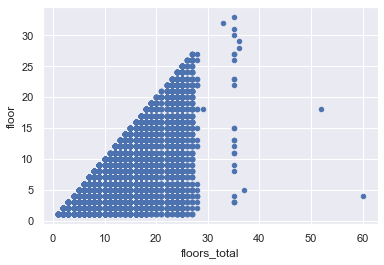

In [37]:
#обработаем значения в столбце 'floors_total'
#посмотрим график
data.plot(x='floors_total', y='floor', kind='scatter')
plt.show()

In [38]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4, 24,
        8,  2, 10,  7, 15, 22, 13, 20, 28, 36, 21, 35, 60,  1, 29, 33, 52,
       37])

In [39]:
#видим выбивающееся значение на 60 (такой этажности в СПБ нет, удалим значение, узнав индекс строки)
data.drop(index=2253, inplace=True)

In [40]:
#также удалим строку с домом, в котором 52 этажа
data.drop(index=16731, inplace=True)

In [41]:
#проверяем, удалился ли дом с 60 этажами
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4, 24,
        8,  2, 10,  7, 15, 22, 13, 20, 28, 36, 21, 35,  1, 29, 33, 37])

In [42]:
#с помощью метода info() проверим, сколько у нас осталось значений для исследования после обработки датафрейма
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20726 non-null  int32         
 1   last_price            20726 non-null  float64       
 2   total_area            20726 non-null  float64       
 3   first_day_exposition  20726 non-null  datetime64[ns]
 4   rooms                 20726 non-null  int32         
 5   ceiling_height        13181 non-null  float64       
 6   floors_total          20726 non-null  int32         
 7   living_area           20726 non-null  float64       
 8   floor                 20726 non-null  int32         
 9   is_apartment          20726 non-null  bool          
 10  studio                20726 non-null  bool          
 11  open_plan             20726 non-null  object        
 12  kitchen_area          20726 non-null  float64       
 13  balcony         

In [43]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2,Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10,1,NaN,12,14.40,5,True,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00


Промежуточный вывод.
Мы заполнили пропуски там, где это было возможно и точечно удалили аномалии в некоторых столбцах.
Да, часть значений мы потеряли, но большая часть осталась. Перевели данные в другой тип там, где это было необходимо.

Добавим новые столбцы в датасет:

In [44]:
#добавляем столбец "цена одного квадратного метра"
data['one_metre_cost'] = data['last_price']/data['total_area']

In [45]:
#путем получения отдельных частей даты и времени добавляем в датасет столбец 'month_exposition'
data['month_exposition'] = data['first_day_exposition'].dt.month

#таким же образом добавляем в датасет столбец 'year_exposition'
data['year_exposition'] = data['first_day_exposition'].dt.year

#и добавляем в датасет столбец 'day_exposition', далее заменим в нем значения
data['day_exposition'] = data['first_day_exposition'].dt.weekday

In [46]:
#создадим функцию, присваивающую название дню недели
def day_applying(day_exposition):
    try:
        if day_exposition == 0:
            return 'понедельник'
        elif day_exposition == 1:
            return 'вторник'
        elif day_exposition == 2:
            return 'среда'
        elif day_exposition == 3:
            return 'четверг'
        elif day_exposition == 4:
            return 'пятница'
        elif day_exposition == 5:
            return 'суббота'
        elif day_exposition == 6:
            return 'воскресенье'
    except:
        pass

In [47]:
#добавляем в столбец результат работы функции
data['day_exposition'] = data['day_exposition'].apply(day_applying)

In [48]:
#создадим функцию с определением этажа, на котором находится квартира
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [49]:
#добавляем столбец "тип этажа квартиры"
data['floor_type'] = data.apply(categorize_floor, axis=1)

In [50]:
#добавим столбец с расстоянием до центра города в километрах 
data['km_to_the_center'] = round(data['cityCenters_nearest']/1000).astype('int', errors='ignore')

### Этап 3. Исследовательский анализ

In [51]:
#перед исследованием данных еще раз выведем первые 10 строк таблицы и инфо о таблице
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metre_cost,month_exposition,year_exposition,day_exposition,floor_type,km_to_the_center
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",3,2019,четверг,другой,16.00
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2,Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",12,2018,вторник,первый,19.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",8,2015,четверг,другой,14.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",6,2018,вторник,другой,8.00
5,10,"2,890,000.00",30.40,2018-09-10,1,NaN,12,14.40,5,True,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,"95,065.79",9,2018,понедельник,другой,NaN
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,True,False,False,14.40,1,Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,"99,195.71",11,2017,четверг,другой,19.00
8,20,"2,900,000.00",33.16,2018-05-23,1,NaN,27,15.43,26,True,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,"87,454.76",5,2018,среда,другой,NaN
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,"88,524.59",2,2017,воскресенье,другой,15.00
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,True,False,False,8.50,0,Санкт-Петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00,"127,525.25",11,2017,четверг,другой,14.00
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,"48,252.00","51,677.00",0.00,NaN,0.00,NaN,7.00,"75,000.00",8,2018,понедельник,другой,52.00


**11. Изучение параметров объектов.**

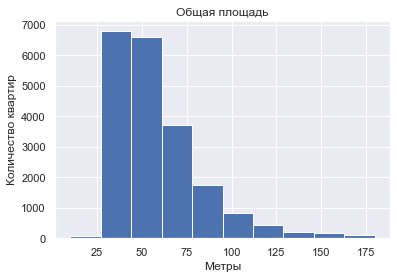

In [52]:
#изучим параметр "общая площадь жилья"
plt.hist(data['total_area'], bins=10, range=(10, 180))
plt.title('Общая площадь')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Исходя из графика выше видно, что больше всего на рынке квартир от 30 до 75 кв.м., - хорошие однушки и трешки. Однако, есть квартиры и большей площадью, вероятно трешки и квартиры с 4 комнатами.

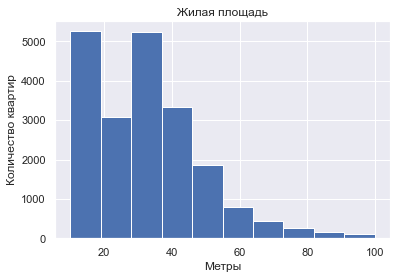

In [53]:
#изучим жилую площадь
plt.hist(data['living_area'], bins=10, range=(10, 100))
plt.title('Жилая площадь')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

На графике видно, что большинство значений столбца `living area` находятся в пределах значений от 15 до 60. Самое большое количество значений на ~15м и ~30м.

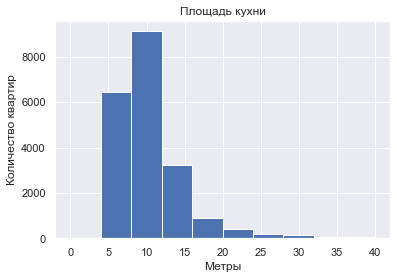

In [54]:
#изучим площадь кухни
plt.hist(data['kitchen_area'], bins=10, range=(0, 40))
plt.title('Площадь кухни')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Большие кухни в квартирах Санкт-Петербурга и Ленинградской области - большая редкость. Пиковые значения находятся в пределах 5-10 метров. Даже 15 метров - это уже роскошь. Это при том, что у нас есть в датасете квартиры и по 200 метров!

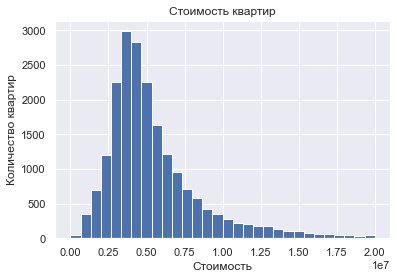

In [55]:
#построим график с ценой 
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

Если посмотреть на график, то заметно следующее: большая часть квартир стоят  от 2,5 млн до 5 млн. рублей. 

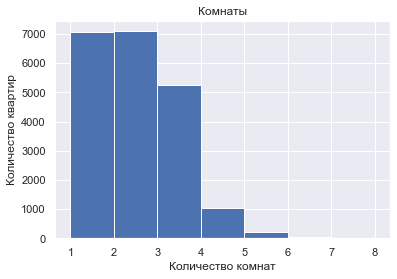

In [56]:
# изучим ситуацию с количеством комнат
plt.hist(data['rooms'], bins=7, range=(1,8))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Больше всего в датасете однушек-трешек, намного меньше четырехкомнатных квартир, а пятикомнатных вообще единицы. 

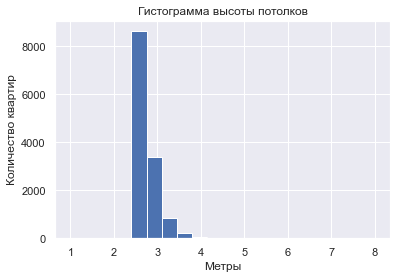

In [57]:
#изучим ситуацию с высотой потолков
plt.hist(data['ceiling_height'], bins=20, range=(1,8))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

На графике мы видим, что почти все значения в датасете находятся на 2,5 - 3,5 метра. Вероятно, в новых домах потолки ниже, а в старом фонде - выше. 

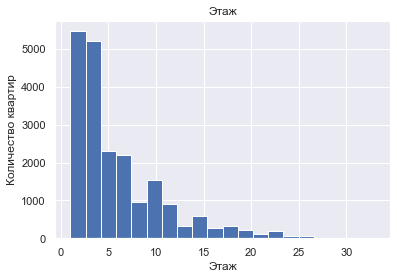

In [58]:
#изучим ситуацию с этажом квартиры
plt.hist(data['floor'], bins=20)
plt.title('Этаж')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Исходя из графика очень много квартир расположено на первом-третьем этажах. Большинство квартир расположено не выше 10 этажа. Предполагаю, что это хрущевки и сталинки. 
Ниже сразу логично посмотреть на график по расположению этажа в доме. 

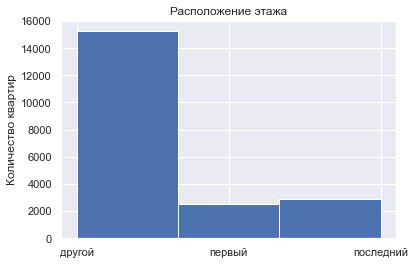

In [59]:
plt.hist(data['floor_type'], bins=3)
plt.title('Расположение этажа')

plt.ylabel('Количество квартир')
plt.show()

Все сходится с выводом выше. В датасете практически равное количество квартир, расположенных на первом и последнем этажах. Большинство квартир из объявлений находятся ни на первом, ни на последнем этаже.

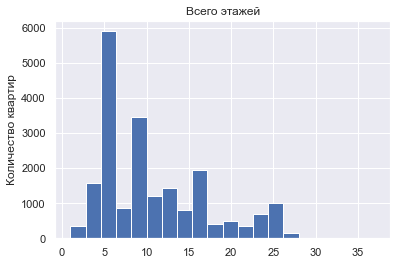

In [60]:
plt.hist(data['floors_total'], bins=20)
plt.title('Всего этажей')

plt.ylabel('Количество квартир')
plt.show()

На графике мы видим, что у нас в датасете большинство домов - стандартные пятиэтажки и девятиэтажки.

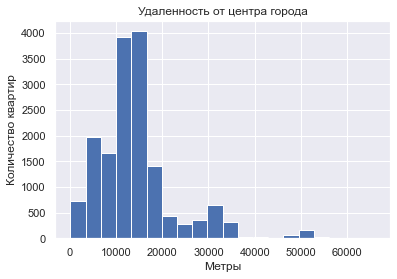

In [61]:
#посмотрим, что с удаленностью от центра города
plt.hist(data['cityCenters_nearest'], bins=20)
plt.title('Удаленность от центра города')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Исходя из графика видно, что большинство объектов находятся не дальше 25 км. от центра. 
Такая статистика получилась по следующим причинам:
- пропуски мы заполняли в этом столбце нулями, поэтому и такой пик на нуле;
- помимо СПБ мы рассматриваем и другие небольшие населенные пункты Ленинградской области, в которых центр может быть от дома в ~200 метрах.

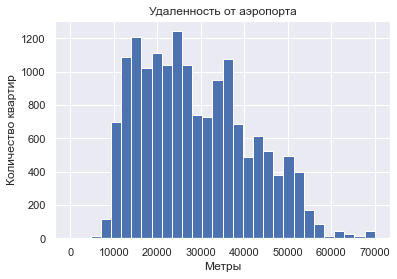

In [62]:
#посмотрим расстояние до ближайшего аэропорта
plt.hist(data['airports_nearest'], bins=30, range=(0, 70000))
plt.title('Удаленность от аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Большинство объектов находятся довольно далеко от аэропорта: 10 - 30 км. 

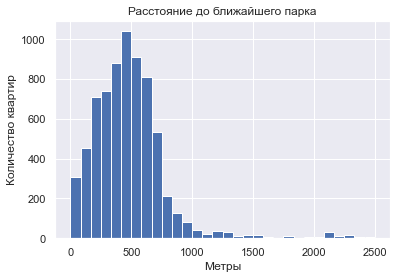

In [63]:
# посмотрим расстояние до ближайшего парка
plt.hist(data['parks_nearest'], bins=30, range=(0,2500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Исходя из графика, складывается ощущение, что практически всем будущим покупателям жилья повезет, - ведь в ~500 метрах от них будет парк!
Однако, все не так просто. В нашем исследуемом датасете (после предварительной обработки) в указанном столбце пропущено 34% значений. 
Поскольку обычно наличие рядом парка повышает стоимость жилья (в теории), то, если парк рядом есть, его отмечают, а вот если нет, - могут ничего в объявлении и не написать. 
Также такие показатели могут объясняться тем, что под парком понимают сквер/зеленые насаждения. 

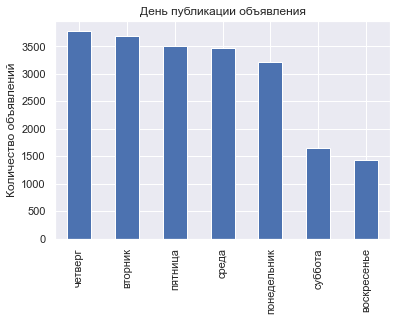

In [64]:
#посмотрим, когда чаще всего публикуют объявления
data['day_exposition'].value_counts().plot.bar()
plt.title('День публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()

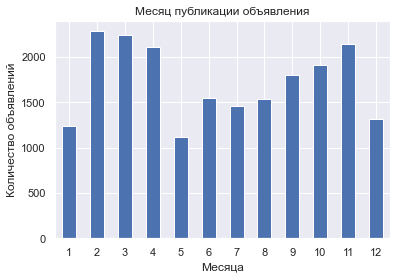

In [87]:
#посмотрим, в каком месяце больше всего публиковали объявления
data['month_exposition'].value_counts().sort_index().plot.bar()
plt.title('Месяц публикации объявления')
plt.ylabel('Количество объявлений')
plt.xlabel('Месяца')

plt.xticks(rotation=0) # поворачиваю подписи.
plt.show()

Больше всего объявлений публикуется в конце года, а также в первом квартале. Меньше всего объектов выставляется летом.

Исходя из графика, меньше всего объявлений публикуется в выходные: в субботу и в воскресенье. 

**Выводы:**
- больше всего на рынке квартир с 1 - 3 комнатами;
- в среднем жилая площадь составляет 15-60 м.;
- кухни от 5 до 10 метров, кухни свыше 15 - очень редки;
- потолки 2,5-3,5 метра (достойно);
- большинство объявлений в пятиэтажках и девятиэтажках, зато не на первом и не на последнем этажах;
- Санкт-Петербург не такой большой, как Москва, поэтому и до центра многим жителям рукой подать, а уж в соседних небольших городах до их центра может быть меньше 1 км.;
- активнее всего публикуют объявления в будни и в конце года (декабрь), а вот летом квартиры выставляют на продажу менее активно.

**12. Изучим скорость продажи квартир.**

In [67]:
print('Время продажи (медиана):', data['days_exposition'].median())
print('Время продажи (среднее):', data['days_exposition'].mean())
data['days_exposition'].describe()

Время продажи (медиана): 101.5
Время продажи (среднее): 184.46802683063163


count   17,890.00
mean       184.47
std        220.56
min          1.00
25%         44.00
50%        101.50
75%        238.00
max      1,580.00
Name: days_exposition, dtype: float64

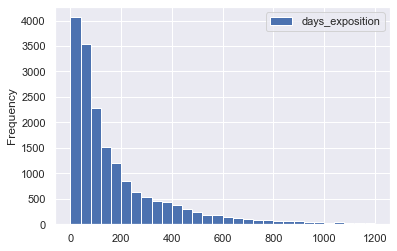

In [68]:
#построим график
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range=(0, 1200))
plt.show()

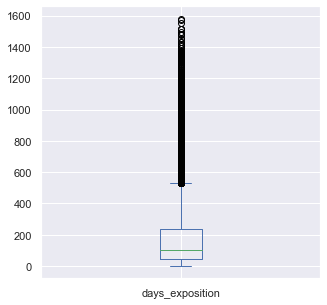

In [69]:
#строим график для понимания, что считать очень долгой продажей
data['days_exposition'].plot(kind='box', figsize=(5,5))
plt.show()

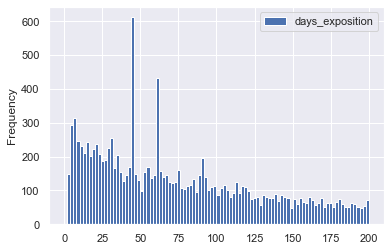

In [70]:
#видим много значений около 0, поэтому подробнее осмотрим этот участок
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, range = (0, 200))
plt.show()

In [71]:
#на графике видим выбивающиеся значения на 45 и 60, оценим их количество
data['days_exposition'].value_counts().head(5)

45.00    518
60.00    340
7.00     200
30.00    195
4.00     160
Name: days_exposition, dtype: int64

Видим выбросы на 45 и 60 день. Вероятно, часть объектов так и была продана, а объявление закрыто на 45 и 60 день, а вот какая-то часть объявлений была снята по каким-то иным причинам, например, после 45 или 60 дня необходимо оплатить дальнейшее размещение объявления, либо данные в объявлении устарели, а владелец объявления их не обновил.

В любом случае быстрой продажей будем считать сделки, совершенные до 45 дня с момента размещения объявления, тк. исходя из результатов работы метода describe() видим, что менее 25% данных находятся за пределами 44.
Долгой продажей можно считать все продажи свыше 550 дней, т.е. 18 месяцев (исходя из графика "ящик с усами").

**13. Влияние факторов на общую (полную) стоимость объектов.**

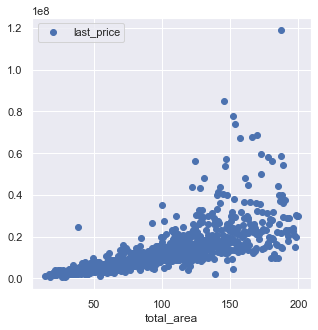

Корреляция цены и площади: 0.718999719640502


In [73]:
#оценим влияние общей площади на стоимость жилья
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:', data['total_area'].corr(data['last_price']))

Размер общей площади квартиры сильно влияет на стоимость жилья: чем больше площадь, - тем дороже квартира. Но не всегда! На цену в совокупности может влиять множество факторов. 

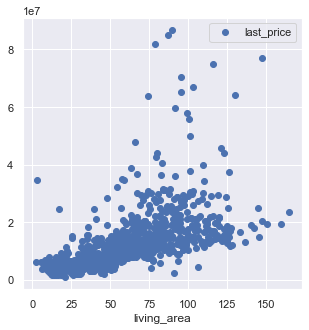

Корреляция цены и жилой площади: 0.6067226563212927


In [74]:
#оценим влияение жилой площади на стоимость жилья
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:', data['living_area'].corr(data['last_price']))

Чуть меньшее влияние на цену имеет размер жилой площади. 

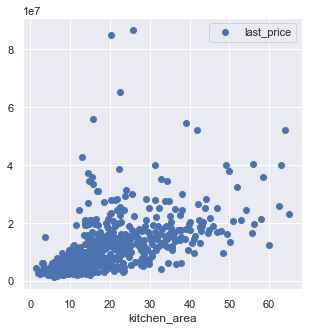

Корреляция цены и площади кухни: 0.5432727112754954


In [75]:
#оценим влияние площади кухни на стоимость жилья
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:', data['kitchen_area'].corr(data['last_price']))

Еще меньшее влияние на цену имеет размер кухни в квартире: есть очень дорогие кватиры с маленькой кухней, а есть с большой кухней, но весьма дешевые по средним меркам.

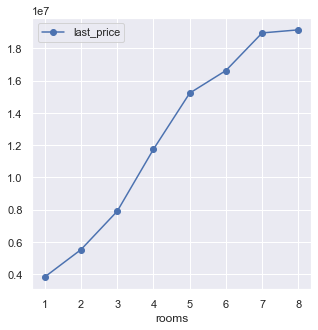

Корреляция цены и количества комнат: 0.43017848008612514


In [76]:
#оценим влияние количества комнат на стоимость жилья
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и количества комнат:', data['rooms'].corr(data['last_price']))

Корреляция между ценой и количеством комнат меньше, чем корреляция между ценой и общей площадью, однако, исходя из грфаика, все логично, - чем больше комнат, - тем дороже цена. 

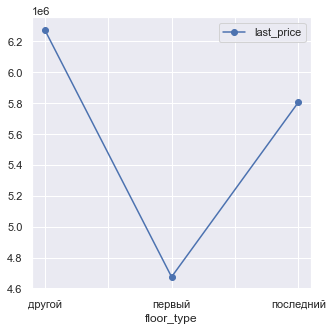

In [77]:
#оценим влияние этажа, на котором расположена квартира, на стоимость жилья
(
    data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Расположение квартиры в доме имеет очень большое влияние на цену объекта: квартиры на первом этаже стоят намного дешевле, чем квартиры, расположенные на других этажах. Квартиры на последнем этаже в среднем также стоят меньше. 

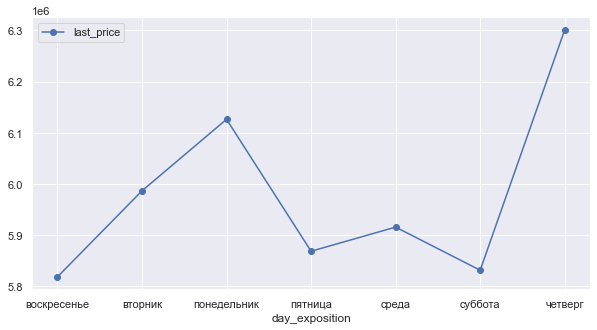

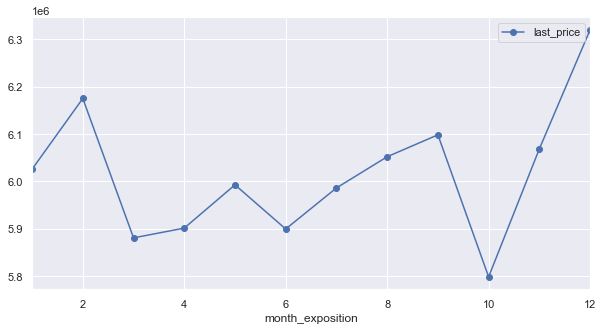

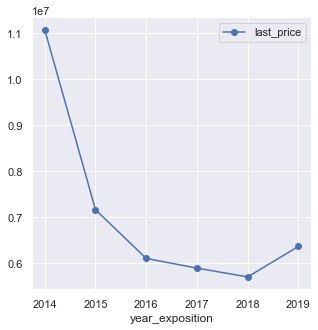

In [78]:
#оценим влияение даты размещения объявления на стоимость жилья
# зависимость от дня размещения
(
    data.pivot_table(index='day_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()
# зависимость от месяца размещения
(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# зависимость от года размещения
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

- На графике видно, что объекты, выставленные в выходные, стоят дешевле других объектов. То есть в выходные и объявлений меньше выставляют, и цена меньше. 
- Объекты, выставленные в июне, стоят кратно меньше, чем объекты, выставленные в сентябре.
- В 2014 году стоимость объектов была сильно выше, а затем пошла на спад, который продлился до 2018 года. С 2018 года по графику наблюдается рост стоимости объектов. 

**14. Считаем среднюю цену 1 кв.м. в 10 населенных пунктах с наибольшим числом объявлений.**

In [79]:
#смотрим, где больше всего объявлений
ten_cities_expositions = data['locality_name'].value_counts().head(10)

In [80]:
#сделаем срез по внешней переменной, которую мы создали выше, а затем оценим данные через сводную таблицу
mean_price_ten_cities = data.query('locality_name in (@ten_cities_expositions.index)').pivot_table(values='one_metre_cost', index='locality_name', aggfunc='mean')
mean_price_ten_cities = mean_price_ten_cities.astype(int)
#отсортируемся по убыванию
mean_price_ten_cities.sort_values('one_metre_cost', ascending=False)

,one_metre_cost
locality_name,
Санкт-Петербург,112458
Пушкин,103290
Кудрово,92248
Парголово,90756
Мурино,85795
Петергоф,83754
Шушары,78393
Колпино,75129
Всеволожск,69029


Самая высокая стоимость жилья из нашей выборки в Санкт-Петербурге (предсказуемо). Самая низкая стоимость квадратного метра в Выборге. 

**15. Средняя цена каждого километра в Санкт-Петербурге.**

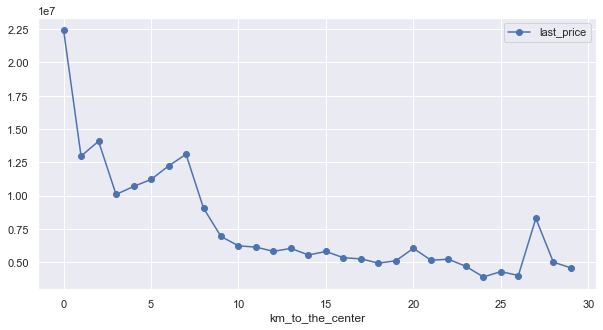

In [81]:
#помним о том, что пропущенные значения в 'km_to_the_center' у нас заполнены нулями, отбросим такие строки
km_center_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_to_the_center', values='last_price', aggfunc='mean')
km_center_spb.plot(style='o-', grid=True, figsize=(10,5))
plt.show()

In [82]:
km_center_spb.head(10)

,last_price
km_to_the_center,
0.00,"22,446,744.19"
1.00,"12,978,961.28"
2.00,"14,091,343.94"
3.00,"10,100,504.57"
4.00,"10,698,558.61"
5.00,"11,222,325.70"
6.00,"12,236,560.87"
7.00,"13,113,973.99"
8.00,"9,076,363.62"


И по графику и по данным, выведенным с помощью head() видим, что чем ближе жилье находится к центру Санкт-Петербурга, - тем оно дороже. Да, есть дорогое жилье в радиусе ~27 километров от центра, но мы не можем исключить, что это квартиры в таунхаусах или очень элитных жилых комплексах. 

### Общий вывод

**1. Важность данных в процессе их предобработки и анализа.**

В полученном датасете было большое количество пропусков и аномалий, а также дубликаты и некорректные типы данных в столбцах. 
В связи с корректно поставленной задачей удалось установить, какие действия необходимо провести с данными на этапе предобработки, чтобы не делать лишнюю работу, ведь не все данные нам нужны для последующего анализа. 
Для того, чтобы в будущем сократить время на предобработку данных, можно, например, обязать пользователей заполнять высоту потолков, а также оптимизировать процесс подстановки значений в столбец с расстоянием до центра города, чтобы избежать пропущенных значений. 

**2. Влияние факторов на стоимость жилья.**

Есть факторы, которые действительно влияют на стоимость объектов:
- общая площадь квартиры, а именно чем квартира больше, тем она дороже;
- расположение квартиры на этаже - в среднем квартира на первом этаже стоит дешевле, чем на других этажах;
- удаленность от центра города (применимо к СПб) - чем дальше жилье от центра, тем оно дешевле, как правило (исключениями могут являться элитная недвижимость/таунхаусы).

**3. Наблюдения о рынке недвижимости в Санкт-Петербурге и соседних населенных пунктах.**

- В среднем квартира продается за 6 месяцев, но есть также и очень быстрые, и очень медленные продажи;
- Дороже всего кв.м. в Санкт-Петербурге, а вот в Выборге уже можно приобрести жилье практически в 2 раза дешевле;
- Типичная застройка СПб и близлежащих городов - пятиэтажки и девятиэтажки с потолком около 2,6 метра и маленькой кухней;
- Начиная с 2014 года количество выставленных на продажу объектов упало в несколько раз;
- В среднем у объектов хорошая транспортная доступность до аэропорта, а также имеется в наличии какой-то парк/зеленая зона. 